In [1]:
import gsw
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mocsy import mocsy

### Central SoG Slice

In [2]:
#years, months, data
CSoG_array_Tinsitu_slice = np.zeros([1,12,50,50])
CSoG_array_Spsu_slice = np.zeros([1,12,50,50])
CSoG_array_TA_slice = np.zeros([1,12,50,50])
CSoG_array_DIC_slice = np.zeros([1,12,50,50])

# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(0,5),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2015, 2016), ['Tinsitu','Spsu','TA','DIC']
# Temporary list dict
data = {}
# Permanent aggregate dict
monthlydat = {var: {} for var in variables}
# Loop through years
for year in [2015, 2016]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_{datestr}_{datestr}'
        # Load grid variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = (gsw.t_from_CT(ds.vosaline.isel(deptht=slice(0,5), **slc).values,ds.votemper.isel(deptht=slice(0,5), **slc).values,0))
            q2 = q[:,0,:,:]
            CSoG_array_Tinsitu_slice[0,month-1,:,:] = q2 
            for var in ['Tinsitu']:
                data[var].append(gsw.t_from_CT(ds.vosaline.isel(deptht=slice(0,5), **slc).values,ds.votemper.isel(deptht=slice(0,5), **slc).values,0))
                
        
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = (ds.vosaline.isel(deptht=slice(0,5), **slc).values)*35/35.16504
            q2 = q[:,0,:,:]
            CSoG_array_Spsu_slice[0,month-1,:,:] = q2 
            for var in ['Spsu']:
                data[var].append((ds.vosaline.isel(deptht=slice(0,5), **slc).values)*35/35.16504)
        
        with xr.open_dataset(prefix + '_carp_T.nc') as ds:
            q = (ds.total_alkalinity.isel(deptht=slice(0,5), **slc).values)/1000
            q2 = q[:,0,:,:]
            CSoG_array_TA_slice[0,month-1,:,:] = q2 
            for var in ['TA']:
                data[var].append((ds.total_alkalinity.isel(deptht=slice(0,5), **slc).values)/1000)
        
        
        with xr.open_dataset(prefix + '_carp_T.nc') as ds:
            q = (ds.dissolved_inorganic_carbon.isel(deptht=slice(0,5), **slc).values)/1000
            q2 = q[:,0,:,:]
            CSoG_array_DIC_slice[0,month-1,:,:] = q2 
            for var in ['DIC']:
                data[var].append((ds.dissolved_inorganic_carbon.isel(deptht=slice(0,5), **slc).values)/1000)
        

In [3]:
CSoG_array_Tinsitu_slice[CSoG_array_Tinsitu_slice == 0 ] = np.nan
CSoG_array_Tinsitu_slicemean = \
np.nanmean(np.nanmean(CSoG_array_Tinsitu_slice, axis = 2),axis = 2)
print(np.shape(CSoG_array_Tinsitu_slicemean))

(1, 12)


In [4]:
CSoG_array_Spsu_slice[CSoG_array_Spsu_slice == 0 ] = np.nan
CSoG_array_Spsu_slicemean = \
np.nanmean(np.nanmean(CSoG_array_Spsu_slice, axis = 2),axis = 2)
print(np.shape(CSoG_array_Spsu_slicemean))

(1, 12)


In [5]:
CSoG_array_TA_slice[CSoG_array_TA_slice == 0 ] = np.nan
CSoG_array_TA_slicemean = \
np.nanmean(np.nanmean(CSoG_array_TA_slice, axis = 2),axis = 2)
print(np.shape(CSoG_array_TA_slicemean))

(1, 12)


In [6]:
CSoG_array_DIC_slice[CSoG_array_DIC_slice == 0 ] = np.nan
CSoG_array_DIC_slicemean = \
np.nanmean(np.nanmean(CSoG_array_DIC_slice, axis = 2),axis = 2)
print(np.shape(CSoG_array_DIC_slicemean))

(1, 12)


In [7]:
ones = np.ones_like(CSoG_array_Spsu_slicemean.flatten())

In [8]:
CSoG_response_tup = mocsy.mvars(temp=CSoG_array_Tinsitu_slicemean.flatten(), sal=CSoG_array_Spsu_slicemean.flatten(), alk=CSoG_array_TA_slicemean.flatten(), 
                           dic=CSoG_array_DIC_slicemean.flatten(), 
                       sil=0.*ones, phos=0.*ones, patm=0.*ones, depth=0.*ones, lat=0.*ones, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
C_pH,C_pco2,C_fco2,C_co2,C_hco3,C_co3,C_OmegaA,C_OmegaC,C_BetaD,C_DENis,C_p,C_Tis = CSoG_response_tup

### Juan de Fuca Slice

In [9]:
#years, months, data
JdF_array_Tinsitu_slice = np.zeros([1,12,200,150])
JdF_array_Spsu_slice = np.zeros([1,12,200,150])
JdF_array_TA_slice = np.zeros([1,12,200,150])
JdF_array_DIC_slice = np.zeros([1,12,200,150])

# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(250,450), 'x': slice(50,200)}
e3t, tmask = [mask[var].isel(z=slice(0,5),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2015, 2016), ['Tinsitu','Spsu','TA','DIC']
# Temporary list dict
data = {}
# Permanent aggregate dict
monthlydat = {var: {} for var in variables}
# Loop through years
for year in [2015, 2016]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_{datestr}_{datestr}'
        # Load grid variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = (gsw.t_from_CT(ds.vosaline.isel(deptht=slice(0,5), **slc).values,ds.votemper.isel(deptht=slice(0,5), **slc).values,0))
            q2 = q[:,0,:,:]
            JdF_array_Tinsitu_slice[0,month-1,:,:] = q2 
            for var in ['Tinsitu']:
                data[var].append(gsw.t_from_CT(ds.vosaline.isel(deptht=slice(0,5), **slc).values,ds.votemper.isel(deptht=slice(0,5), **slc).values,0))
                
        
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = (ds.vosaline.isel(deptht=slice(0,5), **slc).values)*35/35.16504
            q2 = q[:,0,:,:]
            JdF_array_Spsu_slice[0,month-1,:,:] = q2 
            for var in ['Spsu']:
                data[var].append((ds.vosaline.isel(deptht=slice(0,5), **slc).values)*35/35.16504)
        
        with xr.open_dataset(prefix + '_carp_T.nc') as ds:
            q = (ds.total_alkalinity.isel(deptht=slice(0,5), **slc).values)/1000
            q2 = q[:,0,:,:]
            JdF_array_TA_slice[0,month-1,:,:] = q2 
            for var in ['TA']:
                data[var].append((ds.total_alkalinity.isel(deptht=slice(0,5), **slc).values)/1000)
        
        
        with xr.open_dataset(prefix + '_carp_T.nc') as ds:
            q = (ds.dissolved_inorganic_carbon.isel(deptht=slice(0,5), **slc).values)/1000
            q2 = q[:,0,:,:]
            JdF_array_DIC_slice[0,month-1,:,:] = q2 
            for var in ['DIC']:
                data[var].append((ds.dissolved_inorganic_carbon.isel(deptht=slice(0,5), **slc).values)/1000)
        

In [10]:
JdF_array_Tinsitu_slice[JdF_array_Tinsitu_slice == 0 ] = np.nan
JdF_array_Tinsitu_slicemean = \
np.nanmean(np.nanmean(JdF_array_Tinsitu_slice, axis = 2),axis = 2)
print(np.shape(JdF_array_Tinsitu_slicemean))

(1, 12)


In [11]:
JdF_array_Spsu_slice[JdF_array_Spsu_slice == 0 ] = np.nan
JdF_array_Spsu_slicemean = \
np.nanmean(np.nanmean(JdF_array_Spsu_slice, axis = 2),axis = 2)
print(np.shape(JdF_array_Spsu_slicemean))

(1, 12)


In [12]:
JdF_array_TA_slice[JdF_array_TA_slice == 0 ] = np.nan
JdF_array_TA_slicemean = \
np.nanmean(np.nanmean(JdF_array_TA_slice, axis = 2),axis = 2)
print(np.shape(JdF_array_TA_slicemean))

(1, 12)


In [13]:
JdF_array_DIC_slice[JdF_array_DIC_slice == 0 ] = np.nan
JdF_array_DIC_slicemean = \
np.nanmean(np.nanmean(JdF_array_DIC_slice, axis = 2),axis = 2)
print(np.shape(JdF_array_DIC_slicemean))

(1, 12)


In [14]:
ones = np.ones_like(JdF_array_Spsu_slicemean.flatten())

In [15]:
JdF_response_tup = mocsy.mvars(temp=JdF_array_Tinsitu_slicemean.flatten(), sal=JdF_array_Spsu_slicemean.flatten(), alk=JdF_array_TA_slicemean.flatten(), 
                           dic=JdF_array_DIC_slicemean.flatten(), 
                       sil=0.*ones, phos=0.*ones, patm=0.*ones, depth=0.*ones, lat=0.*ones, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
JdF_pH,JdF_pco2,JdF_fco2,JdF_co2,JdF_hco3,JdF_co3,JdF_OmegaA,JdF_OmegaC,JdF_BetaD,JdF_DENis,JdF_p,JdF_Tis = JdF_response_tup

### Northern SoG Slice

In [16]:
#years, months, data
NSoG_array_Tinsitu_slice = np.zeros([1,12,50,40])
NSoG_array_Spsu_slice = np.zeros([1,12,50,40])
NSoG_array_TA_slice = np.zeros([1,12,50,40])
NSoG_array_DIC_slice = np.zeros([1,12,50,40])

# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(650,700), 'x': slice(140,180)}
e3t, tmask = [mask[var].isel(z=slice(0,5),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2015, 2016), ['Tinsitu','Spsu','TA','DIC']
# Temporary list dict
data = {}
# Permanent aggregate dict
monthlydat = {var: {} for var in variables}
# Loop through years
for year in [2015, 2016]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_{datestr}_{datestr}'
        # Load grid variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = (gsw.t_from_CT(ds.vosaline.isel(deptht=slice(0,5), **slc).values,ds.votemper.isel(deptht=slice(0,5), **slc).values,0))
            q2 = q[:,0,:,:]
            NSoG_array_Tinsitu_slice[0,month-1,:,:] = q2 
            for var in ['Tinsitu']:
                data[var].append(gsw.t_from_CT(ds.vosaline.isel(deptht=slice(0,5), **slc).values,ds.votemper.isel(deptht=slice(0,5), **slc).values,0))
                
        
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = (ds.vosaline.isel(deptht=slice(0,5), **slc).values)*35/35.16504
            q2 = q[:,0,:,:]
            NSoG_array_Spsu_slice[0,month-1,:,:] = q2 
            for var in ['Spsu']:
                data[var].append((ds.vosaline.isel(deptht=slice(0,5), **slc).values)*35/35.16504)
        
        with xr.open_dataset(prefix + '_carp_T.nc') as ds:
            q = (ds.total_alkalinity.isel(deptht=slice(0,5), **slc).values)/1000
            q2 = q[:,0,:,:]
            NSoG_array_TA_slice[0,month-1,:,:] = q2 
            for var in ['TA']:
                data[var].append((ds.total_alkalinity.isel(deptht=slice(0,5), **slc).values)/1000)
        
        
        with xr.open_dataset(prefix + '_carp_T.nc') as ds:
            q = (ds.dissolved_inorganic_carbon.isel(deptht=slice(0,5), **slc).values)/1000
            q2 = q[:,0,:,:]
            NSoG_array_DIC_slice[0,month-1,:,:] = q2 
            for var in ['DIC']:
                data[var].append((ds.dissolved_inorganic_carbon.isel(deptht=slice(0,5), **slc).values)/1000)
        

In [17]:
NSoG_array_Tinsitu_slice[NSoG_array_Tinsitu_slice == 0 ] = np.nan
NSoG_array_Tinsitu_slicemean = \
np.nanmean(np.nanmean(NSoG_array_Tinsitu_slice, axis = 2),axis = 2)
print(np.shape(NSoG_array_Tinsitu_slicemean))

(1, 12)


In [18]:
NSoG_array_Spsu_slice[NSoG_array_Spsu_slice == 0 ] = np.nan
NSoG_array_Spsu_slicemean = \
np.nanmean(np.nanmean(NSoG_array_Spsu_slice, axis = 2),axis = 2)
print(np.shape(NSoG_array_Spsu_slicemean))

(1, 12)


In [19]:
NSoG_array_TA_slice[NSoG_array_TA_slice == 0 ] = np.nan
NSoG_array_TA_slicemean = \
np.nanmean(np.nanmean(NSoG_array_TA_slice, axis = 2),axis = 2)
print(np.shape(NSoG_array_TA_slicemean))

(1, 12)


In [20]:
NSoG_array_DIC_slice[NSoG_array_DIC_slice == 0 ] = np.nan
NSoG_array_DIC_slicemean = \
np.nanmean(np.nanmean(NSoG_array_DIC_slice, axis = 2),axis = 2)
print(np.shape(NSoG_array_DIC_slicemean))

(1, 12)


In [21]:
ones = np.ones_like(NSoG_array_Spsu_slicemean.flatten())

In [22]:
NSoG_response_tup = mocsy.mvars(temp=NSoG_array_Tinsitu_slicemean.flatten(), sal=NSoG_array_Spsu_slicemean.flatten(), alk=NSoG_array_TA_slicemean.flatten(), 
                           dic=NSoG_array_DIC_slicemean.flatten(), 
                       sil=0.*ones, phos=0.*ones, patm=0.*ones, depth=0.*ones, lat=0.*ones, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
NSoG_pH,NSoG_pco2,NSoG_fco2,NSoG_co2,NSoG_hco3,NSoG_co3,NSoG_OmegaA,NSoG_OmegaC,NSoG_BetaD,NSoG_DENis,NSoG_p,NSoG_Tis = NSoG_response_tup

### Southern SoG Slice

In [23]:
#years, months, data
SSoG_array_Tinsitu_slice = np.zeros([1,12,75,50])
SSoG_array_Spsu_slice = np.zeros([1,12,75,50])
SSoG_array_TA_slice = np.zeros([1,12,75,50])
SSoG_array_DIC_slice = np.zeros([1,12,75,50])

# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(325,400), 'x': slice(275,325)}
e3t, tmask = [mask[var].isel(z=slice(0,5),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2015, 2016), ['Tinsitu','Spsu','TA','DIC']
# Temporary list dict
data = {}
# Permanent aggregate dict
monthlydat = {var: {} for var in variables}
# Loop through years
for year in [2015, 2016]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_{datestr}_{datestr}'
        # Load grid variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = (gsw.t_from_CT(ds.vosaline.isel(deptht=slice(0,5), **slc).values,ds.votemper.isel(deptht=slice(0,5), **slc).values,0))
            q2 = q[:,0,:,:]
            SSoG_array_Tinsitu_slice[0,month-1,:,:] = q2 
            for var in ['Tinsitu']:
                data[var].append(gsw.t_from_CT(ds.vosaline.isel(deptht=slice(0,5), **slc).values,ds.votemper.isel(deptht=slice(0,5), **slc).values,0))
                
        
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = (ds.vosaline.isel(deptht=slice(0,5), **slc).values)*35/35.16504
            q2 = q[:,0,:,:]
            SSoG_array_Spsu_slice[0,month-1,:,:] = q2 
            for var in ['Spsu']:
                data[var].append((ds.vosaline.isel(deptht=slice(0,5), **slc).values)*35/35.16504)
        
        with xr.open_dataset(prefix + '_carp_T.nc') as ds:
            q = (ds.total_alkalinity.isel(deptht=slice(0,5), **slc).values)/1000
            q2 = q[:,0,:,:]
            SSoG_array_TA_slice[0,month-1,:,:] = q2 
            for var in ['TA']:
                data[var].append((ds.total_alkalinity.isel(deptht=slice(0,5), **slc).values)/1000)
        
        
        with xr.open_dataset(prefix + '_carp_T.nc') as ds:
            q = (ds.dissolved_inorganic_carbon.isel(deptht=slice(0,5), **slc).values)/1000
            q2 = q[:,0,:,:]
            SSoG_array_DIC_slice[0,month-1,:,:] = q2 
            for var in ['DIC']:
                data[var].append((ds.dissolved_inorganic_carbon.isel(deptht=slice(0,5), **slc).values)/1000)
        

In [24]:
SSoG_array_Tinsitu_slice[SSoG_array_Tinsitu_slice == 0 ] = np.nan
SSoG_array_Tinsitu_slicemean = \
np.nanmean(np.nanmean(SSoG_array_Tinsitu_slice, axis = 2),axis = 2)
print(np.shape(SSoG_array_Tinsitu_slicemean))

(1, 12)


In [25]:
SSoG_array_Spsu_slice[SSoG_array_Spsu_slice == 0 ] = np.nan
SSoG_array_Spsu_slicemean = \
np.nanmean(np.nanmean(SSoG_array_Spsu_slice, axis = 2),axis = 2)
print(np.shape(SSoG_array_Spsu_slicemean))

(1, 12)


In [26]:
SSoG_array_TA_slice[SSoG_array_TA_slice == 0 ] = np.nan
SSoG_array_TA_slicemean = \
np.nanmean(np.nanmean(SSoG_array_TA_slice, axis = 2),axis = 2)
print(np.shape(SSoG_array_TA_slicemean))

(1, 12)


In [27]:
SSoG_array_DIC_slice[SSoG_array_DIC_slice == 0 ] = np.nan
SSoG_array_DIC_slicemean = \
np.nanmean(np.nanmean(SSoG_array_DIC_slice, axis = 2),axis = 2)
print(np.shape(SSoG_array_DIC_slicemean))

(1, 12)


In [28]:
ones = np.ones_like(SSoG_array_Spsu_slicemean.flatten())

In [29]:
SSoG_response_tup = mocsy.mvars(temp=SSoG_array_Tinsitu_slicemean.flatten(), sal=SSoG_array_Spsu_slicemean.flatten(), alk=SSoG_array_TA_slicemean.flatten(), 
                           dic=SSoG_array_DIC_slicemean.flatten(), 
                       sil=0.*ones, phos=0.*ones, patm=0.*ones, depth=0.*ones, lat=0.*ones, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
SSoG_pH,SSoG_pco2,SSoG_fco2,SSoG_co2,SSoG_hco3,SSoG_co3,SSoG_OmegaA,SSoG_OmegaC,SSoG_BetaD,SSoG_DENis,SSoG_p,SSoG_Tis = SSoG_response_tup

### Haro Strait Slice

In [30]:
#years, months, data
HS_array_Tinsitu_slice = np.zeros([1,12,40,50])
HS_array_Spsu_slice = np.zeros([1,12,40,50])
HS_array_TA_slice = np.zeros([1,12,40,50])
HS_array_DIC_slice = np.zeros([1,12,40,50])

# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(280,320), 'x': slice(200,250)}
e3t, tmask = [mask[var].isel(z=slice(0,5),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2015, 2016), ['Tinsitu','Spsu','TA','DIC']
# Temporary list dict
data = {}
# Permanent aggregate dict
monthlydat = {var: {} for var in variables}
# Loop through years
for year in [2015, 2016]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_{datestr}_{datestr}'
        # Load grid variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = (gsw.t_from_CT(ds.vosaline.isel(deptht=slice(0,5), **slc).values,ds.votemper.isel(deptht=slice(0,5), **slc).values,0))
            q2 = q[:,0,:,:]
            HS_array_Tinsitu_slice[0,month-1,:,:] = q2 
            for var in ['Tinsitu']:
                data[var].append(gsw.t_from_CT(ds.vosaline.isel(deptht=slice(0,5), **slc).values,ds.votemper.isel(deptht=slice(0,5), **slc).values,0))
                
        
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = (ds.vosaline.isel(deptht=slice(0,5), **slc).values)*35/35.16504
            q2 = q[:,0,:,:]
            HS_array_Spsu_slice[0,month-1,:,:] = q2 
            for var in ['Spsu']:
                data[var].append((ds.vosaline.isel(deptht=slice(0,5), **slc).values)*35/35.16504)
        
        with xr.open_dataset(prefix + '_carp_T.nc') as ds:
            q = (ds.total_alkalinity.isel(deptht=slice(0,5), **slc).values)/1000
            q2 = q[:,0,:,:]
            HS_array_TA_slice[0,month-1,:,:] = q2 
            for var in ['TA']:
                data[var].append((ds.total_alkalinity.isel(deptht=slice(0,5), **slc).values)/1000)
        
        
        with xr.open_dataset(prefix + '_carp_T.nc') as ds:
            q = (ds.dissolved_inorganic_carbon.isel(deptht=slice(0,5), **slc).values)/1000
            q2 = q[:,0,:,:]
            HS_array_DIC_slice[0,month-1,:,:] = q2 
            for var in ['DIC']:
                data[var].append((ds.dissolved_inorganic_carbon.isel(deptht=slice(0,5), **slc).values)/1000)
        

In [31]:
HS_array_Tinsitu_slice[HS_array_Tinsitu_slice == 0 ] = np.nan
HS_array_Tinsitu_slicemean = \
np.nanmean(np.nanmean(HS_array_Tinsitu_slice, axis = 2),axis = 2)
print(np.shape(HS_array_Tinsitu_slicemean))

(1, 12)


In [32]:
HS_array_Spsu_slice[HS_array_Spsu_slice == 0 ] = np.nan
HS_array_Spsu_slicemean = \
np.nanmean(np.nanmean(HS_array_Spsu_slice, axis = 2),axis = 2)
print(np.shape(HS_array_Spsu_slicemean))

(1, 12)


In [33]:
HS_array_TA_slice[HS_array_TA_slice == 0 ] = np.nan
HS_array_TA_slicemean = \
np.nanmean(np.nanmean(HS_array_TA_slice, axis = 2),axis = 2)
print(np.shape(HS_array_TA_slicemean))

(1, 12)


In [34]:
HS_array_DIC_slice[HS_array_DIC_slice == 0 ] = np.nan
HS_array_DIC_slicemean = \
np.nanmean(np.nanmean(HS_array_DIC_slice, axis = 2),axis = 2)
print(np.shape(HS_array_DIC_slicemean))

(1, 12)


In [35]:
ones = np.ones_like(HS_array_Spsu_slicemean.flatten())

In [36]:
HS_response_tup = mocsy.mvars(temp=HS_array_Tinsitu_slicemean.flatten(), sal=HS_array_Spsu_slicemean.flatten(), alk=HS_array_TA_slicemean.flatten(), 
                           dic=HS_array_DIC_slicemean.flatten(), 
                       sil=0.*ones, phos=0.*ones, patm=0.*ones, depth=0.*ones, lat=0.*ones, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
HS_pH,HS_pco2,HS_fco2,HS_co2,HS_hco3,HS_co3,HS_OmegaA,HS_OmegaC,HS_BetaD,HS_DENis,HS_p,HS_Tis = HS_response_tup

### Central Basin Puget Sound Slice

In [37]:
#years, months, data
PS_array_Tinsitu_slice = np.zeros([1,12,50,55])
PS_array_Spsu_slice = np.zeros([1,12,50,55])
PS_array_TA_slice = np.zeros([1,12,50,55])
PS_array_DIC_slice = np.zeros([1,12,50,55])

# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(75,125), 'x': slice(225,280)}
e3t, tmask = [mask[var].isel(z=slice(0,5),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2015, 2016), ['Tinsitu','Spsu','TA','DIC']
# Temporary list dict
data = {}
# Permanent aggregate dict
monthlydat = {var: {} for var in variables}
# Loop through years
for year in [2015, 2016]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_{datestr}_{datestr}'
        # Load grid variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = (gsw.t_from_CT(ds.vosaline.isel(deptht=slice(0,5), **slc).values,ds.votemper.isel(deptht=slice(0,5), **slc).values,0))
            q2 = q[:,0,:,:]
            PS_array_Tinsitu_slice[0,month-1,:,:] = q2 
            for var in ['Tinsitu']:
                data[var].append(gsw.t_from_CT(ds.vosaline.isel(deptht=slice(0,5), **slc).values,ds.votemper.isel(deptht=slice(0,5), **slc).values,0))
                
        
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = (ds.vosaline.isel(deptht=slice(0,5), **slc).values)*35/35.16504
            q2 = q[:,0,:,:]
            PS_array_Spsu_slice[0,month-1,:,:] = q2 
            for var in ['Spsu']:
                data[var].append((ds.vosaline.isel(deptht=slice(0,5), **slc).values)*35/35.16504)
        
        with xr.open_dataset(prefix + '_carp_T.nc') as ds:
            q = (ds.total_alkalinity.isel(deptht=slice(0,5), **slc).values)/1000
            q2 = q[:,0,:,:]
            PS_array_TA_slice[0,month-1,:,:] = q2 
            for var in ['TA']:
                data[var].append((ds.total_alkalinity.isel(deptht=slice(0,5), **slc).values)/1000)
        
        
        with xr.open_dataset(prefix + '_carp_T.nc') as ds:
            q = (ds.dissolved_inorganic_carbon.isel(deptht=slice(0,5), **slc).values)/1000
            q2 = q[:,0,:,:]
            PS_array_DIC_slice[0,month-1,:,:] = q2 
            for var in ['DIC']:
                data[var].append((ds.dissolved_inorganic_carbon.isel(deptht=slice(0,5), **slc).values)/1000)
        

In [38]:
PS_array_Tinsitu_slice[PS_array_Tinsitu_slice == 0 ] = np.nan
PS_array_Tinsitu_slicemean = \
np.nanmean(np.nanmean(PS_array_Tinsitu_slice, axis = 2),axis = 2)
print(np.shape(PS_array_Tinsitu_slicemean))

(1, 12)


In [39]:
PS_array_Spsu_slice[PS_array_Spsu_slice == 0 ] = np.nan
PS_array_Spsu_slicemean = \
np.nanmean(np.nanmean(PS_array_Spsu_slice, axis = 2),axis = 2)
print(np.shape(PS_array_Spsu_slicemean))

(1, 12)


In [40]:
PS_array_TA_slice[PS_array_TA_slice == 0 ] = np.nan
PS_array_TA_slicemean = \
np.nanmean(np.nanmean(PS_array_TA_slice, axis = 2),axis = 2)
print(np.shape(PS_array_TA_slicemean))

(1, 12)


In [41]:
PS_array_DIC_slice[PS_array_DIC_slice == 0 ] = np.nan
PS_array_DIC_slicemean = \
np.nanmean(np.nanmean(PS_array_DIC_slice, axis = 2),axis = 2)
print(np.shape(PS_array_DIC_slicemean))

(1, 12)


In [42]:
ones = np.ones_like(PS_array_Spsu_slicemean.flatten())

In [43]:
PS_response_tup = mocsy.mvars(temp=PS_array_Tinsitu_slicemean.flatten(), sal=PS_array_Spsu_slicemean.flatten(), alk=PS_array_TA_slicemean.flatten(), 
                           dic=PS_array_DIC_slicemean.flatten(), 
                       sil=0.*ones, phos=0.*ones, patm=0.*ones, depth=0.*ones, lat=0.*ones, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
PS_pH,PS_pco2,PS_fco2,PS_co2,PS_hco3,PS_co3,PS_OmegaA,PS_OmegaC,PS_BetaD,PS_DENis,PS_p,PS_Tis = PS_response_tup

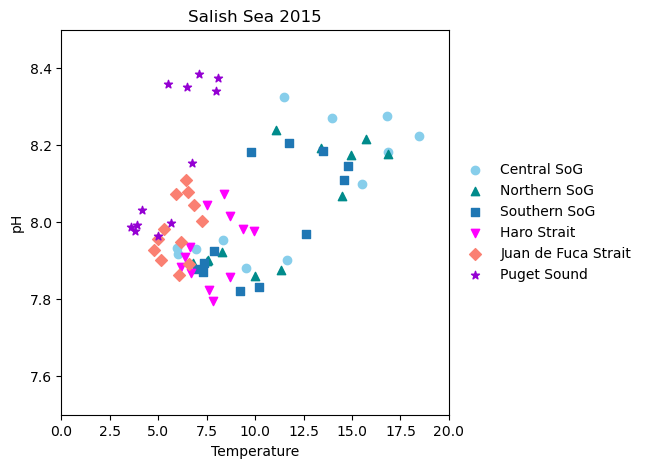

In [72]:

fig, ax = plt.subplots(figsize=(5,5))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
ax.scatter(C_Tis, C_pH,label='Central SoG',color='skyblue')
ax.scatter(NSoG_Tis, NSoG_pH,label='Northern SoG',color='darkcyan',marker='^')
ax.scatter(SSoG_Tis, SSoG_pH,label='Southern SoG',marker='s')
ax.scatter(HS_Tis, HS_pH,label='Haro Strait',color='fuchsia',marker='v')
ax.scatter(JdF_Tis, JdF_pH,label='Juan de Fuca Strait',color='salmon',marker='D')
ax.scatter(PS_Tis, PS_pH,label='Puget Sound',color='darkviolet',marker='*')
ax.set_xlim(0,20)
ax.set_ylim(7.5,8.5)
ax.set_xlabel('Temperature')
ax.set_ylabel('pH')
ax.set_title('Salish Sea 2015')
ax.legend(frameon=False,loc='center left',bbox_to_anchor=(1, 0.5))    

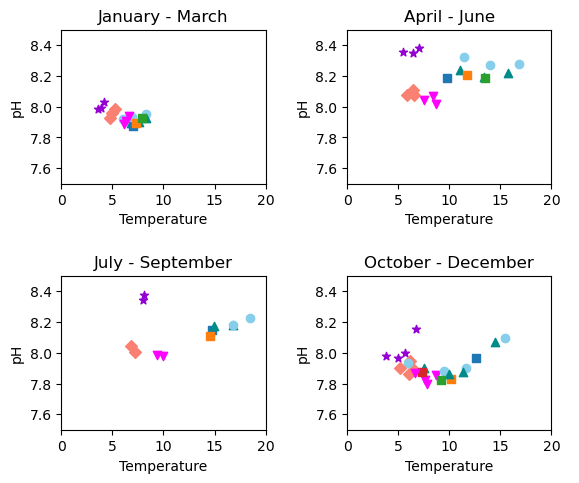

In [73]:
fig, ax = plt.subplots(2,2,figsize=(7,5))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
plt.subplots_adjust(left=0.2,
                    bottom=0.2,
                    right=0.9,
                    top=1,
                    wspace=0.4,
                    hspace=0.6)

for i in range (0,3):
    ax[0,0].scatter(C_Tis[i], C_pH[i],label='Central SoG',color='skyblue')
    ax[0,0].scatter(NSoG_Tis[i], NSoG_pH[i],label='Northern SoG',color='darkcyan',marker='^')
    ax[0,0].scatter(SSoG_Tis[i], SSoG_pH[i],label='Southern SoG',marker='s')
    ax[0,0].scatter(HS_Tis[i], HS_pH[i],label='Haro Strait',color='fuchsia',marker='v')
    ax[0,0].scatter(JdF_Tis[i], JdF_pH[i],label='Juan de Fuca Strait',color='salmon',marker='D')
    ax[0,0].scatter(PS_Tis[i], PS_pH[i],label='Puget Sound',color='darkviolet',marker='*')
    ax[0,0].set_xlim(0,20)
    ax[0,0].set_ylim(7.5,8.5)
    ax[0,0].set_xlabel('Temperature')
    ax[0,0].set_ylabel('pH')
    ax[0,0].set_title('January - March')
    ax[0,0].legend((),frameon=False,loc='center left',bbox_to_anchor=(1, 0.5))  

for i in range (3,6):
    ax[0,1].scatter(C_Tis[i], C_pH[i],label='Central SoG',color='skyblue')
    ax[0,1].scatter(NSoG_Tis[i], NSoG_pH[i],label='Northern SoG',color='darkcyan',marker='^')
    ax[0,1].scatter(SSoG_Tis[i], SSoG_pH[i],label='Southern SoG',marker='s')
    ax[0,1].scatter(HS_Tis[i], HS_pH[i],label='Haro Strait',color='fuchsia',marker='v')
    ax[0,1].scatter(JdF_Tis[i], JdF_pH[i],label='Juan de Fuca Strait',color='salmon',marker='D')
    ax[0,1].scatter(PS_Tis[i], PS_pH[i],label='Puget Sound',color='darkviolet',marker='*')
    ax[0,1].set_xlim(0,20)
    ax[0,1].set_ylim(7.5,8.5)
    ax[0,1].set_xlabel('Temperature')
    ax[0,1].set_ylabel('pH')
    ax[0,1].set_title('April - June')
    ax[0,1].legend((),frameon=False,loc='center left',bbox_to_anchor=(1, 0.5)) 
    

for i in range (6,8):
    ax[1,0].scatter(C_Tis[i], C_pH[i],label='Central SoG',color='skyblue')
    ax[1,0].scatter(NSoG_Tis[i], NSoG_pH[i],label='Northern SoG',color='darkcyan',marker='^')
    ax[1,0].scatter(SSoG_Tis[i], SSoG_pH[i],label='Southern SoG',marker='s')
    ax[1,0].scatter(HS_Tis[i], HS_pH[i],label='Haro Strait',color='fuchsia',marker='v')
    ax[1,0].scatter(JdF_Tis[i], JdF_pH[i],label='Juan de Fuca Strait',color='salmon',marker='D')
    ax[1,0].scatter(PS_Tis[i], PS_pH[i],label='Puget Sound',color='darkviolet',marker='*')
    ax[1,0].set_xlim(0,20)
    ax[1,0].set_ylim(7.5,8.5)
    ax[1,0].set_xlabel('Temperature')
    ax[1,0].set_ylabel('pH')
    ax[1,0].set_title('July - September')
    ax[1,0].legend((),frameon=False,loc='center left',bbox_to_anchor=(1, 0.5)) 

for i in range (8,12):
    ax[1,1].scatter(C_Tis[i], C_pH[i],label='Central SoG',color='skyblue')
    ax[1,1].scatter(NSoG_Tis[i], NSoG_pH[i],label='Northern SoG',color='darkcyan',marker='^')
    ax[1,1].scatter(SSoG_Tis[i], SSoG_pH[i],label='Southern SoG',marker='s')
    ax[1,1].scatter(HS_Tis[i], HS_pH[i],label='Haro Strait',color='fuchsia',marker='v')
    ax[1,1].scatter(JdF_Tis[i], JdF_pH[i],label='Juan de Fuca Strait',color='salmon',marker='D')
    ax[1,1].scatter(PS_Tis[i], PS_pH[i],label='Puget Sound',color='darkviolet',marker='*')
    ax[1,1].set_xlim(0,20)
    ax[1,1].set_ylim(7.5,8.5)
    ax[1,1].set_xlabel('Temperature')
    ax[1,1].set_ylabel('pH')
    ax[1,1].set_title('October - December')
    ax[1,1].legend((),frameon=False,loc='center left',bbox_to_anchor=(1, 0.5))



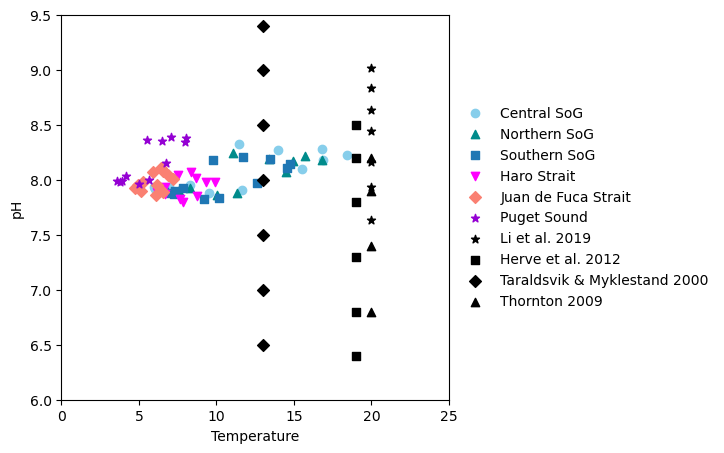

In [74]:
fig, ax = plt.subplots(figsize=(5,5))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

Li_x=[20,20,20,20,20,20,20]
Li_y=[9.02,8.83,8.63,8.44,8.16,7.93,7.63]

Her_x=[19,19,19,19,19,19]
Her_y=[6.4,6.8,7.3,7.8,8.2,8.5]

TM_x=[13,13,13,13,13,13,13]
TM_y=[6.5,7,7.5,8,8.5,9,9.4]

Th_x=[20,20,20,20]
Th_y=[6.8,7.4,7.9,8.2]


ax.scatter(C_Tis, C_pH,label='Central SoG',color='skyblue')
ax.scatter(NSoG_Tis, NSoG_pH,label='Northern SoG',color='darkcyan',marker='^')
ax.scatter(SSoG_Tis, SSoG_pH,label='Southern SoG',marker='s')
ax.scatter(HS_Tis, HS_pH,label='Haro Strait',color='fuchsia',marker='v')
ax.scatter(JdF_Tis, JdF_pH,label='Juan de Fuca Strait',color='salmon',marker='D')
ax.scatter(PS_Tis, PS_pH,label='Puget Sound',color='darkviolet',marker='*')

ax.scatter(Li_x, Li_y,label='Li et al. 2019',color='k',marker='*')
ax.scatter(Her_x, Her_y,label='Herve et al. 2012',color='k',marker='s')
ax.scatter(TM_x, TM_y,label='Taraldsvik & Myklestand 2000',color='k',marker='D')
ax.scatter(Th_x, Th_y,label='Thornton 2009',color='k',marker='^')

ax.set_xlim(0,25)
ax.set_ylim(6,9.5)
ax.set_xlabel('Temperature')
ax.set_ylabel('pH')
ax.legend(frameon=False,loc='center left',bbox_to_anchor=(1, 0.5))    